<center><span style="background-color: rgb(251, 160, 38); font-size: 32px;">  <b>NUCLIO DIGITAL SCHOOL -</b> MASTER EN DATA SCIENCE  </span></center>
    
<br>
    
<center><a href = https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png > <img src="https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png" width=400 height=100><a/></center>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">
<center> <span style="font-size: 26px;">  ARIMA Models in Python </span> </center>

<span style="font-size: 16px;">

+ Session: **ARIMA Models in Python**
+ Module: **Time Series Forecasting**
+ Course: **Data Science Master 0921**
+ Professor: **Christa Santos**

</span>

<br>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

# Intro

In [3]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

ARIMA models are the most traditional way of solving temporary models. We will go one by one reviewing the models that compose it, along with a final example. either to make forecasts or to better understand the data. We won't cover all the theory behind the ARIMA model, but we will show you what steps you need to take to apply it correctly. 

### AR: Auto Regression
Indicates that the time series is regressed on its own lagged values.

### I: Integrated
Indicates that the data values have been replaced by the difference between their values and the previous ones to make the series stationary.

### MA: Moving Average
Indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
#import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


Habrá que repetir algunos de los modelos con el siguiente dataset

In [5]:
link_pax = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df_pax =  pd.read_csv(link_pax, parse_dates = ['Month'], index_col = 'Month')
df_pax.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# AR & MA Models

In time series, autoregression(AR) and moving average (MA) models provide a simple description of a process in terms of two factors--one for autoregression and the other for moving average.  The AR part entails regressing the variable on its own lagged values.  The idea is that the previous time period's value can help us predict the current time period's value. The MA part involves modeling the error term as a linear combination of error terms occurring at the same time step and at various times in the past.

## Autoregressive Models (AR)

Autoregressive (AR) Model is when present value of a time series can be predicted from using previous values of the same series.  It's a regression using its same series, though shifted by a time step, called a lag. The present value is a weighted average of its past values.  Both the t-1 and t-2 are lags of the time series y.  The error term (noise) is represented as e. The values a1 and a2 are the coefficients of the model.

The AR(p) process is described by

𝑦𝑡 = 𝜙1𝑦𝑡−1 + 𝜙2𝑦𝑡−2 + … + 𝜙p𝑦𝑡−p + 𝜖𝑡

We typically represent the order of the model as p for an AR model such as AR(p).

In [6]:
# Simulate a first order AR time series
# AR(1) model is just an ARMA(1,0) model

# Import data generation function
from statsmodels.tsa.arima_process import ArmaProcess

# Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients
# of 0.3 and 0.2 respectively.
# Be sure to flip signs for AR for the arma_generate_sample()
# Here we are going to simulate an AR series of order 1, with coefficient 0.8

ar_coeff = np.array([1, -0.8]) # Add zero lag coeff and negate
ma_coeff = np.array([1]) # Add zero lag coeff

# Generate data
ar_series_1 = ArmaProcess(ar_coeff, ma_coeff)
ts_ar1 = ar_series_1.generate_sample(nsample=1000)

px.line(ts_ar1)


### Stationarity Analysis

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts_ar1)

#to help you, we added the names of every value
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'], result))

{'adf': -10.584466920232478,
 'pvalue': 6.772768960554962e-19,
 'usedlag': 0,
 'nobs': 999,
 'criticalvalues': {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 'icbest': 2830.650850064456}

In [8]:
#Another way of checking stationarity of a generated ts
ar_series_1.isstationary

True

### Autocorrelation and Partial Autocorrelation

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<function matplotlib.pyplot.show(close=None, block=None)>

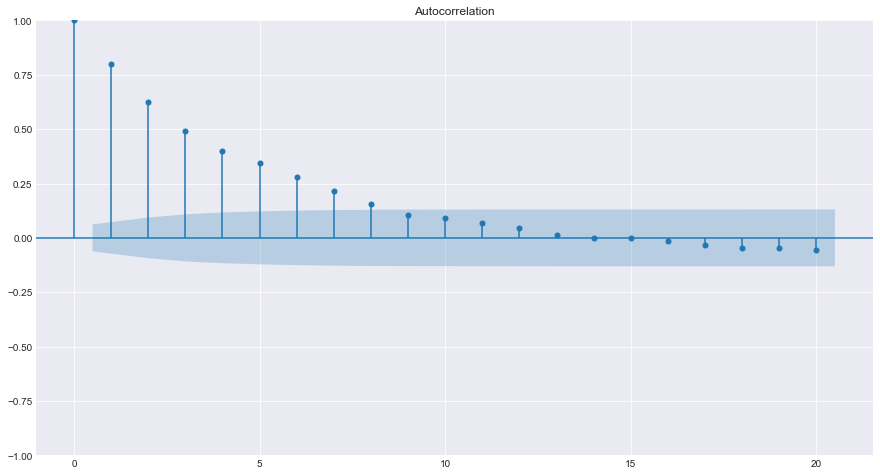

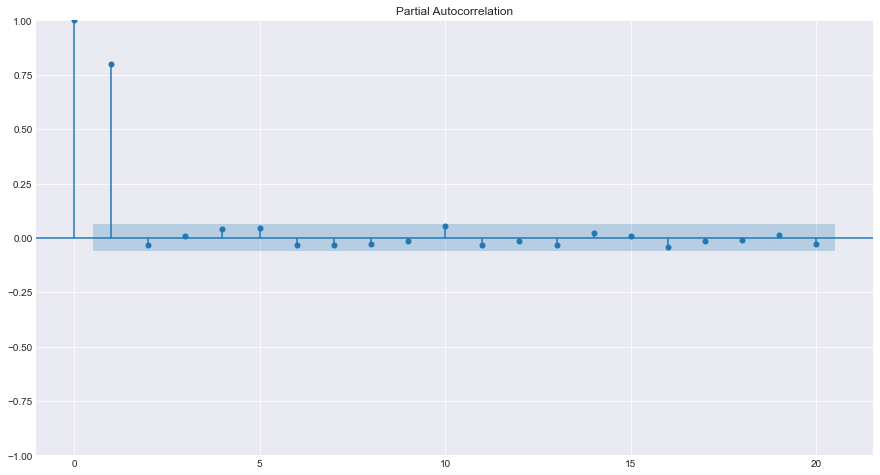

In [9]:
# Plot the ACF and PACF of the generated TS
rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-darkgrid')
plot_acf(ts_ar1, lags=20)
plot_pacf(ts_ar1, lags=20)
plt.show


### Fitting the model

In [10]:
# Fit an AR(1) model to the first simulated data
model = ARIMA(ts_ar1, order=(1, 0, 0))
res = model.fit()
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1448.770
Date:                Mon, 13 Dec 2021   AIC                           2903.540
Time:                        11:31:25   BIC                           2918.263
Sample:                             0   HQIC                          2909.136
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1052      0.161     -0.655      0.512      -0.420       0.209
ar.L1          0.7971      0.019     42.944      0.000       0.761       0.834
sigma2         1.0604      0.049     21.861      0.0

### Diagnosis

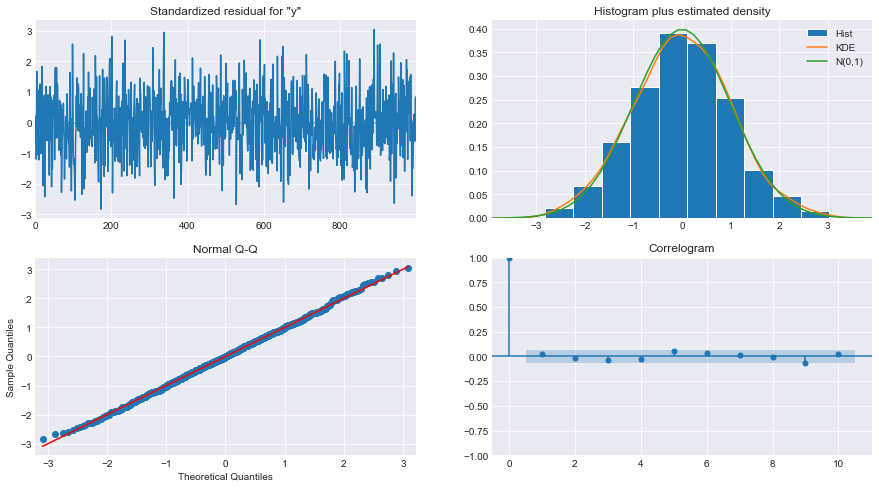

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-darkgrid')

res.plot_diagnostics()
plt.show()


How to interpret the result of the plot_diagnostics?

+ **Top left:** Residual errors appear to fluctuate around a mean of zero and have a uniform variance.
+ **Top right:** The density plot suggests a normal distribution with zero mean.
+ **Bottom left:** All points should be perfectly aligned with the red line. Any significant deviation would imply that the distribution is skewed.
+ **Bottom right:** The correlogram, also known as the ACF plot, shows that the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors that is not explained in the model. So you will have to search for more X (predictors) for the model.

### Prediction

In [12]:
forecast = res.get_prediction(start=-25)
mean_forecast = forecast.predicted_mean
mean_forecast

array([ 0.29486449,  1.8997722 ,  1.630856  ,  2.69464292,  1.14175946,
        1.99417917,  2.1758251 ,  2.1416935 ,  1.9476304 ,  2.42042145,
        3.12710114,  1.98278594,  2.84867113,  1.76831727,  1.44740467,
       -0.83238536, -0.67794969, -1.80061512, -2.18318627, -2.1565037 ,
       -1.5196917 , -1.40224839, -0.92660459, -1.25904647, -0.41469388])

In [13]:

confidence_intervals = forecast.conf_int()
lower_limits = confidence_intervals[:, 0]
upper_limits = confidence_intervals[:, 1]


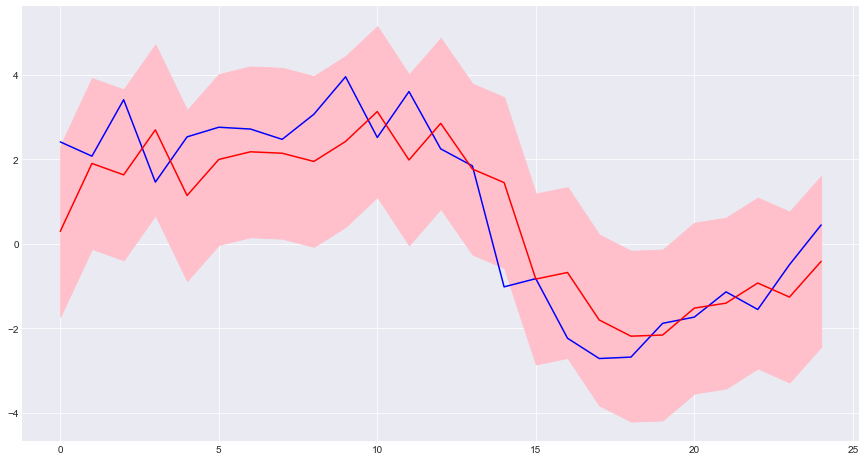

In [14]:
plt.plot(range(25), ts_ar1[-25:], color='blue', label='observed')
plt.plot(range(25), mean_forecast, color='red', label='forecast')
plt.fill_between(range(25), lower_limits, upper_limits, color='pink')
plt.show()


In [15]:
forecast = res.get_forecast(steps=20)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
lower_limits = confidence_intervals[:, 0]
upper_limits = confidence_intervals[:, 1]


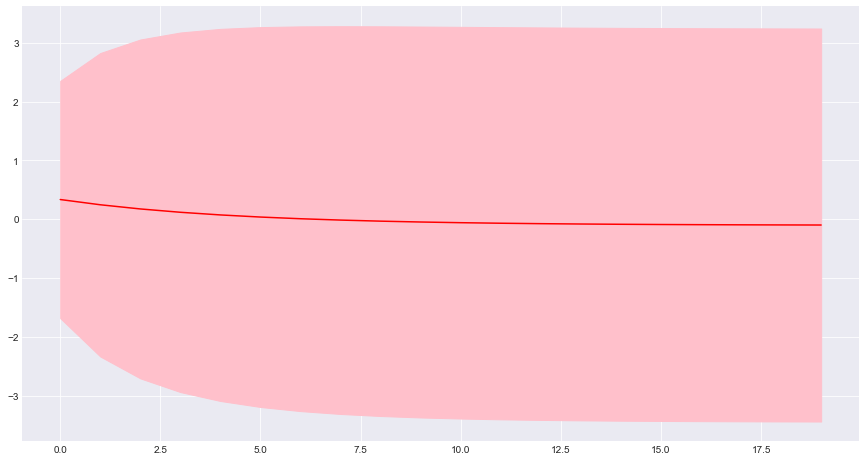

In [16]:
plt.plot(range(20), mean_forecast, color='red', label='forecast')
plt.fill_between(range(20), lower_limits, upper_limits, color='pink')
plt.show()


In [17]:
fitted = res.predict(n_periods=12, return_conf_int=True)
a = res.forecast(steps=100)
a


array([ 0.33435233,  0.24518413,  0.17410393,  0.11744253,  0.07227503,
        0.03626988,  0.00756846, -0.0153108 , -0.03354895, -0.04808744,
       -0.05967676, -0.06891516, -0.07627953, -0.08215002, -0.08682966,
       -0.09056003, -0.09353368, -0.09590412, -0.09779371, -0.09929999,
       -0.10050072, -0.10145787, -0.10222087, -0.10282909, -0.10331393,
       -0.10370042, -0.10400851, -0.1042541 , -0.10444988, -0.10460594,
       -0.10473034, -0.10482951, -0.10490856, -0.10497157, -0.10502181,
       -0.10506185, -0.10509377, -0.10511922, -0.1051395 , -0.10515567,
       -0.10516856, -0.10517883, -0.10518702, -0.10519355, -0.10519875,
       -0.1052029 , -0.10520621, -0.10520885, -0.10521095, -0.10521262,
       -0.10521396, -0.10521502, -0.10521587, -0.10521655, -0.10521709,
       -0.10521752, -0.10521786, -0.10521813, -0.10521835, -0.10521852,
       -0.10521866, -0.10521877, -0.10521886, -0.10521893, -0.10521899,
       -0.10521903, -0.10521907, -0.10521909, -0.10521912, -0.10

In [18]:
print("What parameters do we have?")
print(res.params)


What parameters do we have?
[-0.10521921  0.79714747  1.06039674]


#### AR of Order 2

Text(0.5, 0, '$t$')

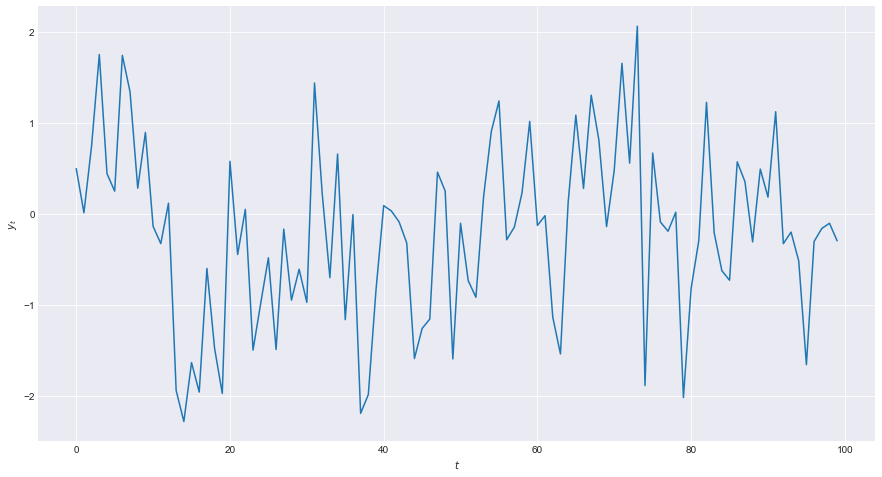

In [19]:
# AR(2) model is just an ARMA(2,0) model

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(42)

# Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients
# of 0.3 and 0.2 respectively.
# Be sure to flip signs for AR for the arma_generate_sample()

ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]   # # Remember to set the lag-0 coefficients to 1.

# Generate data
data = arma_generate_sample(ar_coefs, ma_coefs, nsample=100)  # , sigma=0.5)

rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-darkgrid')
plt.plot(data)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')


<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Moving Average Models

Moving average (MA) is a process where the present value of a time series, y,  is defined as a linear combination of past errors.  The error term (noise) is represented as e. Both the t-1 and t-2 are lags of the time on the errors.


The MA(q) process is described by

𝑦𝑡 = 𝜖𝑡 + θ1𝜖𝑡−1 + θ2𝜖𝑡−2 + … + θq𝜖𝑡−q

We typically represent the order of the model as q for an AR model such as MA(q).

In [20]:
# Simulate a first order MA time series
# MA(1) model is just an ARMA(0,1) model

# Import data generation function
from statsmodels.tsa.arima_process import ArmaProcess

# Set the coefficients for an MA(1) model with MA lag-1 coefficients of -0.9.
# We don't need to flip the sign for the MA coefficients
# Here we are going to simulate an MA series of order 1, with coefficient -0.9.
ar_coeff = np.array([1])
ma_coeff = np.array([1, -0.9])

# Generate data
ma_series_1 = ArmaProcess(ar_coeff, ma_coeff)
ts_ma1 = ma_series_1.generate_sample(nsample=1000)

# Plot the time series
rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-darkgrid')
px.line(ts_ma1)


In [21]:
# Simulate a first order AR time series
# MA(1) model is just an ARMA(0,1) model

# Import data generation function
from statsmodels.tsa.arima_process import ArmaProcess

# Set the coefficients for an MA(1) model with MA lag-1 coefficients of 0.9.
# We don't need to flip the sign for the MA coefficients
# Here we are going to simulate an MA series of order 1, with coefficient 0.9.
ar_coeff = np.array([1])
ma_coeff = np.array([1, 0.9])

# Generate data
ma_series_2 = ArmaProcess(ar_coeff, ma_coeff)
ts_ma2 = ma_series_2.generate_sample(nsample=1000)

# Plot the time series
rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-darkgrid')
px.line(ts_ma2)


## Autocorrelacion

Let's look at the correlation plots for these two generated time series

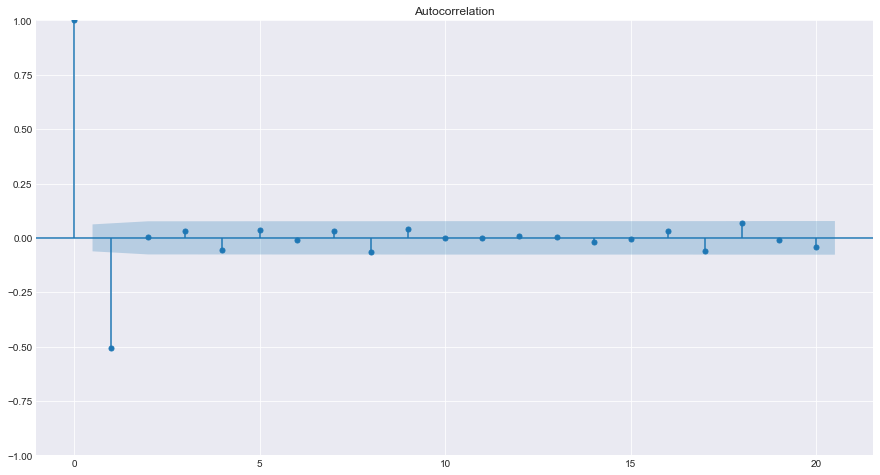

In [22]:
plot_acf(ts_ma1, lags=20)
plt.show()


C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



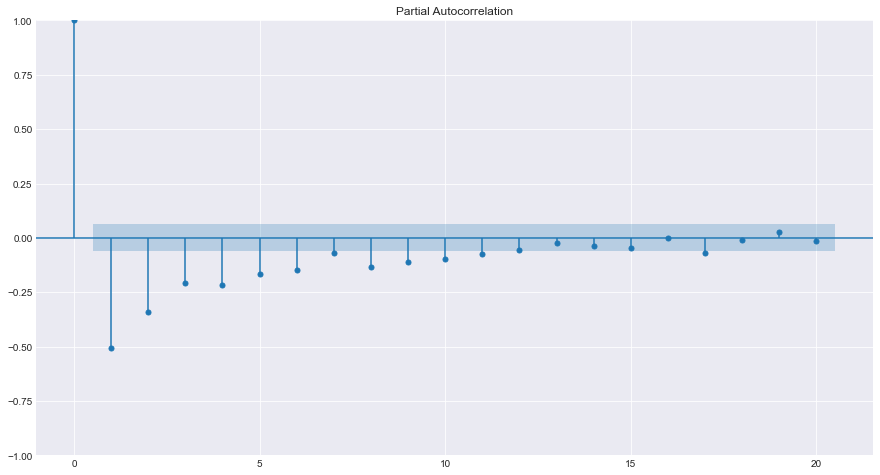

In [23]:
plot_pacf(ts_ma1, lags=20)
plt.show()


***

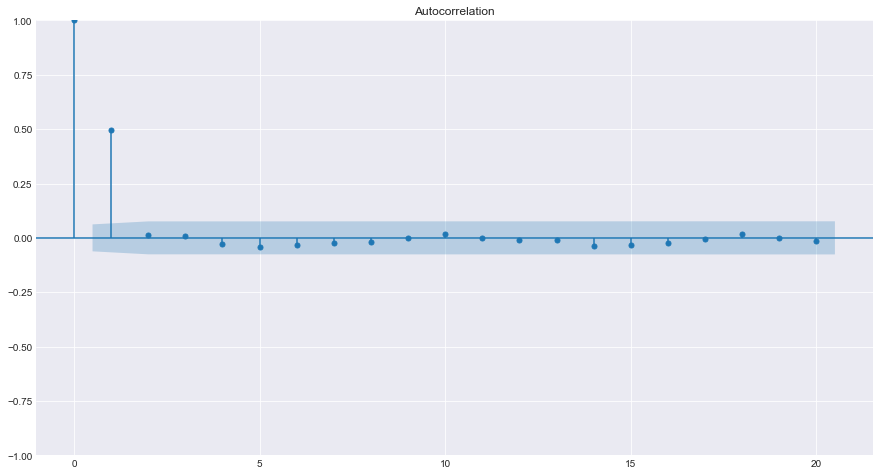

In [24]:
plot_acf(ts_ma2, lags=20)
plt.show()


C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



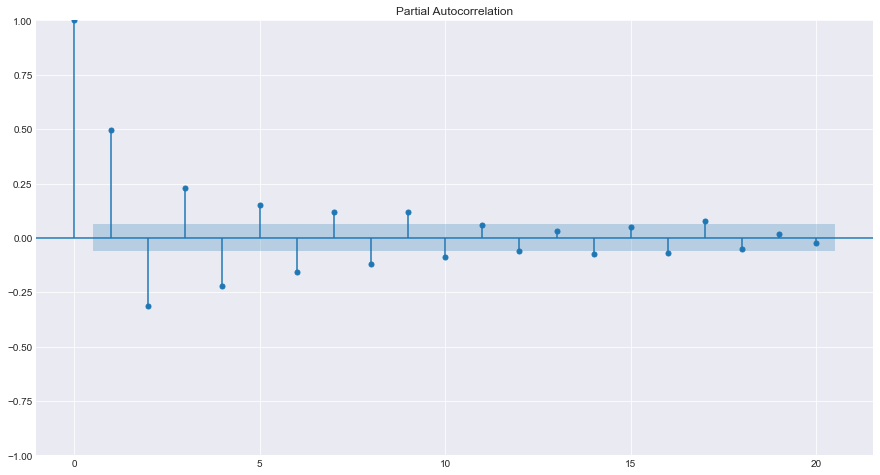

In [25]:
plot_pacf(ts_ma2, lags=20)
plt.show()


***

In [26]:

mod = ARIMA(ts_ma1, order=(0, 0, 1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1401.902
Date:                Mon, 13 Dec 2021   AIC                           2809.803
Time:                        11:31:30   BIC                           2824.527
Sample:                             0   HQIC                          2815.399
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0049      0.003      1.574      0.116      -0.001       0.011
ma.L1         -0.9014      0.014    -63.577      0.000      -0.929      -0.874
sigma2         0.9649      0.043     22.693      0.0

In [27]:
mod = ARIMA(ts_ma2, order=(0, 0, 1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1412.735
Date:                Mon, 13 Dec 2021   AIC                           2831.469
Time:                        11:31:31   BIC                           2846.193
Sample:                             0   HQIC                          2837.065
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0841      0.061      1.383      0.167      -0.035       0.203
ma.L1          0.9286      0.011     81.575      0.000       0.906       0.951
sigma2         0.9857      0.043     22.793      0.0

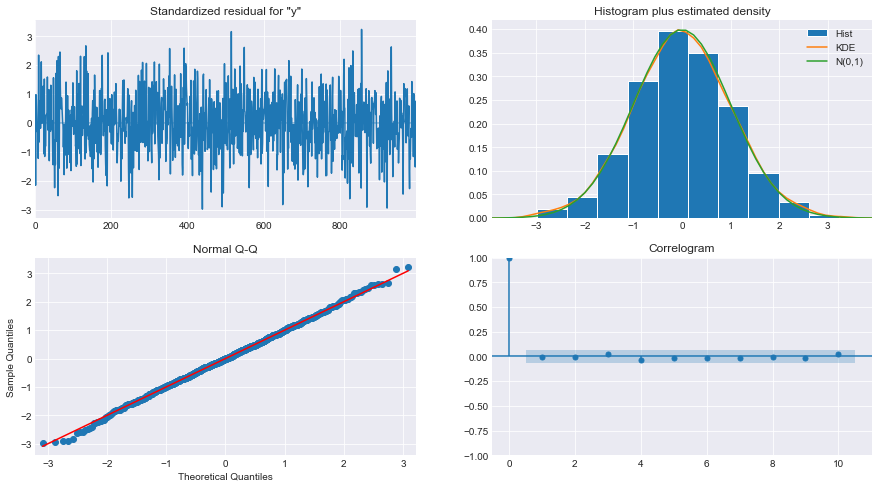

In [28]:

res.plot_diagnostics()
plt.show()

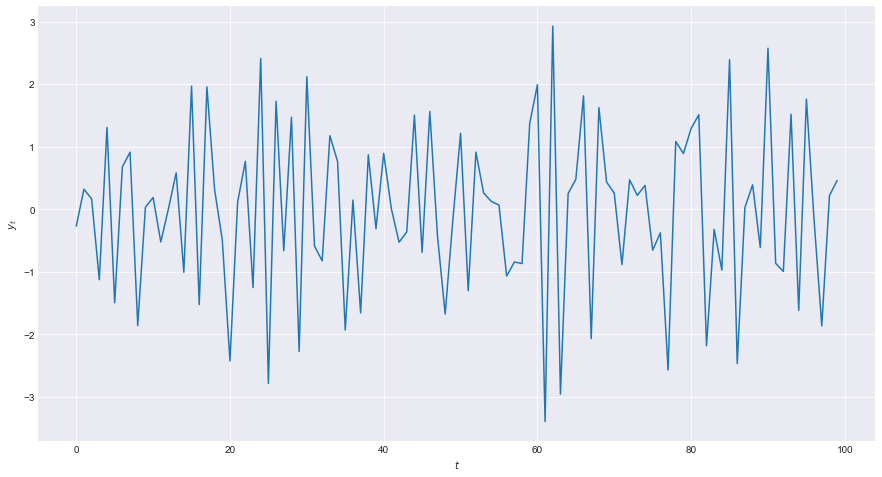

In [29]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(41)

# Set ar_coefs and ma_coefs for an MA(1) model with MA lag-1 coefficient of -0.8.
ar_coefs = [1]  # Remember to set the lag-0 coefficients to 1.
ma_coefs = [1, -0.8]

# Generate data, sigma is standard deviation of the errors
data = arma_generate_sample(ar_coefs, ma_coefs, nsample=100)  # , sigma=0.5)

rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-darkgrid')
plt.plot(data)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()


<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## ARMA Models

We can combine both Autoregressive and Moving Average models together to create an ARMA model. The time series is regressed on the previous values and the previous errors.

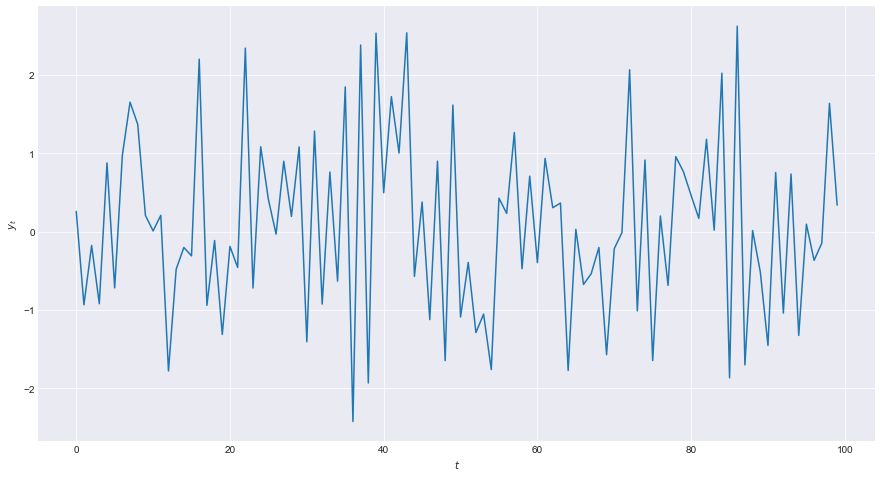

In [30]:
# Set the coefficients for a model with form yt = −0.3yt−1 + 0.2ϵt−1 + 0.4ϵt−2 + ϵt.

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(43)

# Set coefficients
# Remember that for lags greater than zero, you need to pass the negative of the desired AR
# coefficient into the arma_generate_sample() function.
ar_coefs = [1, 0.3]
ma_coefs = [1, 0.2, 0.4]

# ARMA(1,2)

# Generate data
data = arma_generate_sample(ar_coefs, ma_coefs, nsample=100)

rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-darkgrid')
plt.plot(data)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()


### Building an ARMA Model

We will put the autoregression and moving average models together in combination. AR(p) models try to explain the momentum and mean reversion effects.  MA(q) models try to capture the shock effects observed in the white noise terms.  These effects are unexpected or surprise events, hence anomalies. 

In [31]:
df_vacation = pd.read_csv("data/df_vacation.csv",
                          parse_dates=['Month'], index_col=0)
df_vacation.head()


,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


In [32]:
# Estimate ARMA model

# Fit an MA(1) model to the first simulated data
mod = ARIMA(df_vacation, order=(1, 0, 1))  # AR(1) and MA(1)
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                SARIMAX Results                                
Dep. Variable:     Num_Search_Vacation   No. Observations:                  190
Model:                  ARIMA(1, 0, 1)   Log Likelihood                -681.724
Date:                 Mon, 13 Dec 2021   AIC                           1371.448
Time:                         11:31:33   BIC                           1384.436
Sample:                     01-01-2004   HQIC                          1376.709
                          - 10-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.3811      3.319     18.195      0.000      53.877      66.885
ar.L1          0.6893      0.073      9.430      0.000       0.546       0.833
ma.L1          0.3970      0.078      5.098 

In [33]:
# Print out the estimate for the constant and for theta
print(res.params)

# yt = 0.68yt−1 + 0.39ϵt−1 + 60.381085.


const     60.381085
ar.L1      0.689287
ma.L1      0.397026
sigma2    76.042268
dtype: float64


In [34]:
# Forecast ARMA Model

mod = ARIMA(df_vacation, order=(1, 0, 1))
res = mod.fit()

predict = res.get_prediction()
predict_mean = predict.predicted_mean
predict_ci = predict.conf_int()

lower_limits = predict_ci['lower Num_Search_Vacation']
upper_limits = predict_ci['upper Num_Search_Vacation']

predict_dy = res.get_prediction(dynamic='2015-01-01')
predict_dy_mean = predict_dy.predicted_mean
predict_dy_ci = predict_dy.conf_int()

lower_limits_dy = predict_dy_ci['lower Num_Search_Vacation']
upper_limits_dy = predict_dy_ci['upper Num_Search_Vacation']


C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



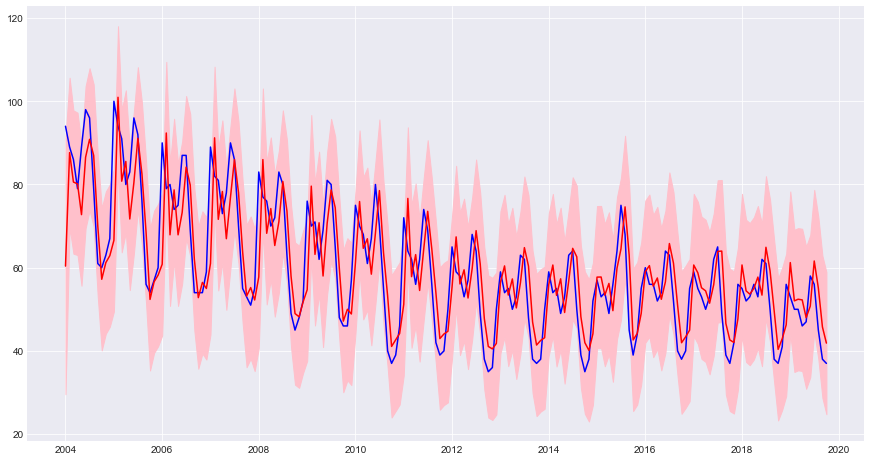

In [35]:
plt.plot(df_vacation.index, df_vacation['Num_Search_Vacation'], color='blue', label='observed')
plt.plot(df_vacation.index, predict_mean.values, color='red', label='forecast')
plt.fill_between(df_vacation.index, lower_limits, upper_limits, color='pink')
plt.show()


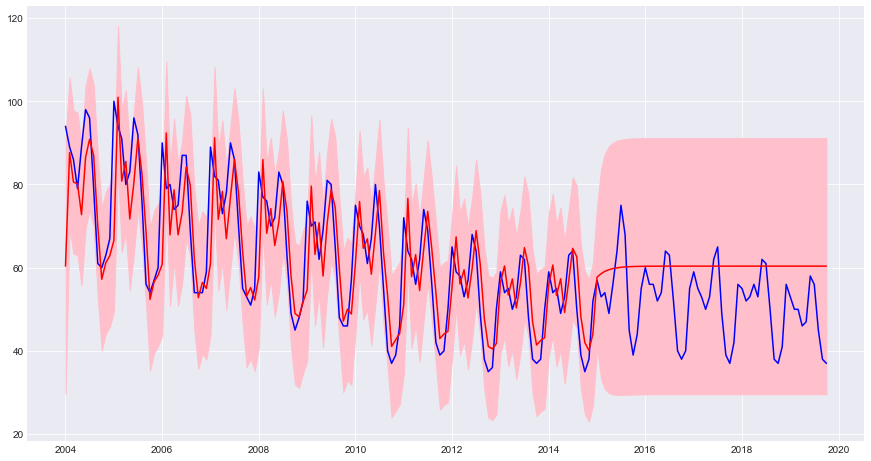

In [36]:
plt.plot(df_vacation.index, df_vacation['Num_Search_Vacation'], color='blue', label='observed')
plt.plot(df_vacation.index, predict_dy_mean.values, color='red', label='forecast')
plt.fill_between(df_vacation.index, lower_limits_dy, upper_limits_dy, color='pink')
plt.show()


## ARIMA Models

For non stationary data the values in ARIMA(p, d, q) stand for:
+ p: The number of lag observations included in the model, also called the lag order
+ d: The number of times that the raw observations are differenced, also called the degree of differencing.
+ q: The size of the moving average window, also called the order of moving average.

In [37]:
model = ARIMA(df_vacation, order=(1, 1, 1))
# fit model
model_fit = model.fit()
print(model_fit.summary())


                                SARIMAX Results                                
Dep. Variable:     Num_Search_Vacation   No. Observations:                  190
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -691.656
Date:                 Mon, 13 Dec 2021   AIC                           1389.311
Time:                         11:31:34   BIC                           1399.037
Sample:                     01-01-2004   HQIC                          1393.251
                          - 10-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0591      0.298     -0.199      0.843      -0.643       0.524
ma.L1          0.3488      0.293      1.192      0.233      -0.225       0.922
sigma2        88.2996      7.974     11.074 

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



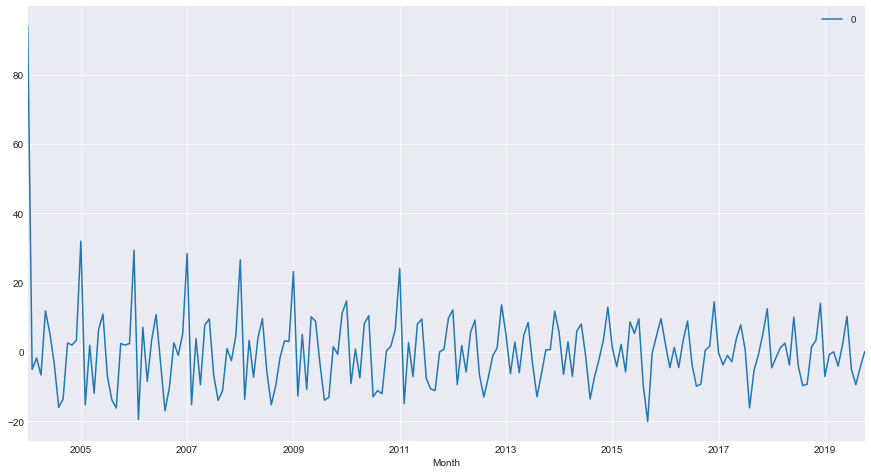

In [38]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()


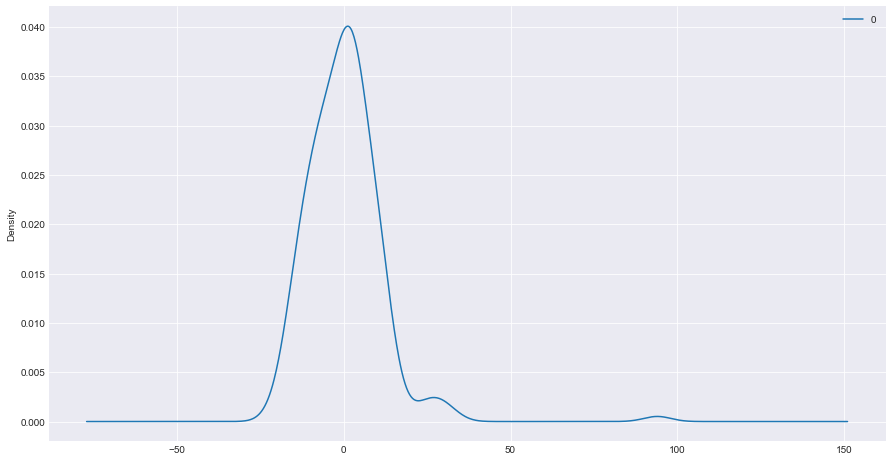

                0
count  190.000000
mean     0.258987
std     11.618746
min    -20.031337
25%     -7.001855
50%      0.406356
75%      5.276676
max     94.000000


In [39]:
# kernel density plot of residual errors
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())


In [40]:
df_furniture = pd.read_csv("data/df_furniture.csv",
                           parse_dates=['Month'], index_col=0)
df_furniture.head()


,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


In [41]:
model = ARIMA(df_furniture, order=(1, 1, 1))
# fit model
model_fit = model.fit()
print(model_fit.summary())


C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                  SARIMAX Results                                   
Dep. Variable:     furniture_price_adjusted   No. Observations:                  331
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2549.201
Date:                      Mon, 13 Dec 2021   AIC                           5104.401
Time:                              11:31:35   BIC                           5115.798
Sample:                          01-01-1992   HQIC                          5108.947
                               - 07-01-2019                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1568      0.066      2.370      0.018       0.027       0.286
ma.L1         -0.7964      0.041    -19.312      0.000      -0.877      -0.716
sigm

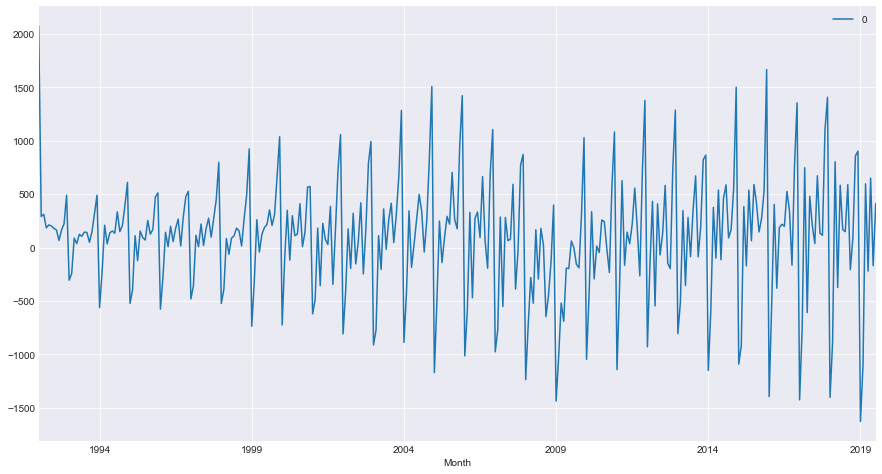

In [42]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()


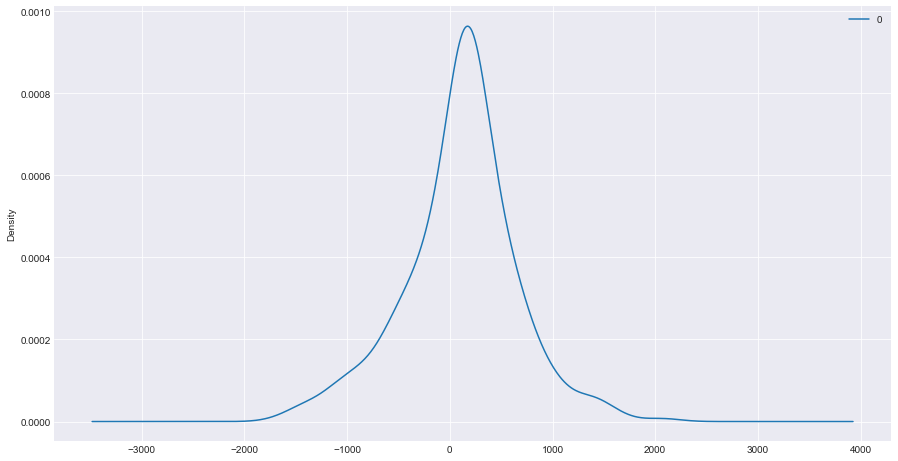

                 0
count   331.000000
mean    102.062917
std     549.714872
min   -1630.186302
25%    -179.014156
50%     147.010976
75%     380.035744
max    2073.432724


In [43]:
# kernel density plot of residual errors
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())


<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## ARIMAX Models

In [44]:
hospital = pd.DataFrame([1.75, 1.66, 1.65, 1.62, 1.48, 1.77, 1.99, 
                         2.17, 1.57, 1.28, 1.44, 1.06, 1.06, 1.2, 
                         0.89, 1.04, 0.77, 0.54, 1.23, 1.33, 1.65, 
                         1.27, 1.26, 1.4, 1.51, 2.13, 2.35, 2.53, 
                         2.19, 1.72, 1.55, 1.19, 0.96, 1.1, 1.16,
                         1.03, 0.71, 0.82, 1.0, 1.51, 1.25, 1.07,
                         0.69, 1.26, 1.73, 1.76, 1.6, 1.59, 2.32,
                         2.41, 1.95, 1.06, 1.24, 1.61, 1.53, 1.26,
                         0.72, 0.71, 0.59, 0.26, 0.61, 0.66, 0.61, 
                         0.97, 1.2, 1.26, 1.0, 0.58, 1.17, 1.81, 2.13, 
                         1.19, 1.38, 1.54, 1.75, 1.74, 1.39, 0.87, 1.66,
                         1.72, 1.48, 1.73, 1.45, 1.0, 1.23, 1.4, 1.05, 
                         0.67, 0.5, 1.13, 1.74, 2.69, 2.29, 2.28, 2.52, 
                         1.92, 1.91, 1.66, 1.98, 1.9, 1.4, 1.01, 1.21, 1.46, 
                         1.8, 1.3, 1.02, 1.46, 1.6, 1.63, 1.47, 1.37, 1.22,
                         1.38, 1.6, 2.44, 2.45, 2.02, 1.72, 1.49, 1.4,
                         1.32, 1.69, 2.01, 2.24, 1.86, 1.4, 1.67, 2.14, 
                         1.51, 1.09, 1.24, 1.66, 1.28, 0.99, 1.15, 1.28, 
                         0.96, 1.3, 1.28, 1.71, 1.56, 1.17, 1.36, 1.78, 2.08,
                         1.97, 2.0, 1.97, 2.02, 1.59, 1.21, 0.86, 0.19, 0.76, 1.08, 0.8, 0.57, 0.94,
                         1.37, 1.61, 1.96, 1.56, 1.1, 1.6, 1.71, 1.29, 1.55], 
                        columns = ['wait_times_hrs'])
hospital['nurse_count'] = [1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 7.0, 9.0, 9.0,
                           9.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0,
                           9.0, 9.0, 7.0, 7.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 
                           5.0, 5.0, 7.0, 7.0, 7.0, 7.0, 7.0, 9.0, 9.0, 9.0, 
                           9.0, 9.0, 9.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0, 1.0, 
                           1.0, 3.0, 3.0, 5.0, 5.0, 5.0, 9.0, 11.0, 11.0, 
                           11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 
                           11.0, 9.0, 9.0, 7.0, 7.0, 5.0, 5.0, 5.0, 5.0, 5.0,
                           7.0, 5.0, 5.0, 7.0, 7.0, 7.0, 7.0, 5.0, 7.0, 7.0, 
                           7.0, 7.0, 7.0, 7.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0,
                           3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 7.0, 7.0, 7.0, 7.0, 7.0,
                           7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 
                           1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 
                           5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 
                           5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 
                           7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 
                           5.0, 5.0, 5.0, 3.0]## Modelos Sarima

In [45]:
model = SARIMAX(hospital['wait_times_hrs'], order=[2, 0, 1], exog = hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 -36.366
Date:                Mon, 13 Dec 2021   AIC                             82.732
Time:                        11:31:36   BIC                             98.352
Sample:                             0   HQIC                            89.072
                                - 168                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
nurse_count    -0.1378      0.019     -7.166      0.000      -0.175      -0.100
ar.L1           0.5711      0.229      2.496      0.013       0.123       1.020
ar.L2           0.4102      0.227      1.808    

In [46]:
# yt = -0.13(nurse_count) + 0.57yt-1 + 0.66et-1 + et

In [47]:
a = results.forecast(steps = 4, exog = [4,5,2,3], alpha= 0.95)

In [48]:

pd.DataFrame(a)

,predicted_mean
168,1.448883
169,1.258767
170,1.657190
171,1.489460


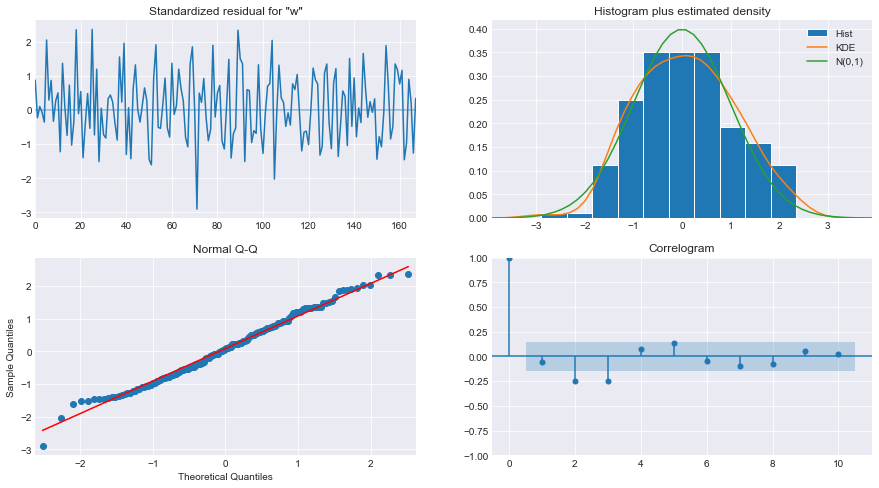

In [49]:
results.plot_diagnostics()
plt.show()

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

# End to End Example

### Read the data

In [50]:
link_pax = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df_pax = pd.read_csv(link_pax, parse_dates = ['Month'], index_col = 'Month')
df_pax.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [51]:
px.line(df_pax['Passengers'])

## Stationarity Test

As you can clearly see, there is a trend over time and that suggests that the data is not stationary. However, to be safe, we will use an augmented Dickey-Fuller test.

In [52]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_pax['Passengers'])
#to help you, we added the names of every value
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))


{'adf': 0.8153688792060543,
 'pvalue': 0.9918802434376411,
 'usedlag': 13,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 996.692930839019}

As we had already seen a very high p-value 1. So we can say that it is not stationary.

The next step is to transform our data to Stationary so we will have an estimate for d and D parameters we will use in the model. This can be done using Differencing and it’s performed by subtracting the previous observation from the current observation.

+ difference(T) = observation(T) — observation(T-1)

<AxesSubplot:xlabel='Month'>

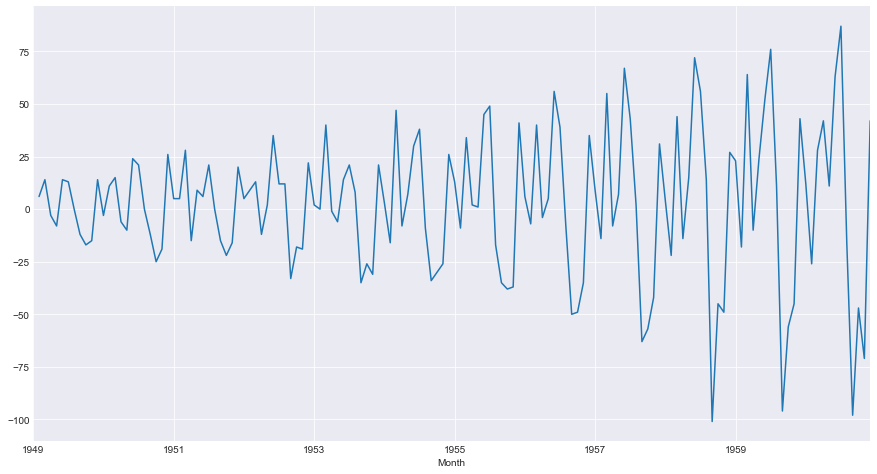

In [53]:
df_pax['diff1'] = df_pax['Passengers'] - df_pax['Passengers'].shift(1)
df_pax['diff1'].plot()

Next, we will check the stationarity again using the augmented Dickey-Fuller test and, if it is stationary, we will move on to the next step. If it is not, we will apply the differentiation again until we have a stationary series. Differentiation can be done very easily with pandas using the shift function.

It appears that we have removed the trend and the series is stationary. However, we will use the augmented Dickey-Fuller test to demonstrate this.

In [54]:
result = adfuller(df_pax['diff1'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'], result))


{'adf': -2.8292668241700034,
 'pvalue': 0.05421329028382497,
 'usedlag': 12,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 988.5069317854084}

As you can see, we do not reject the null hypothesis because we have a p-value> 0.05. This suggests that the series is not stationary and that we have to reuse differentiation by taking the second difference. The second difference can be calculated like the first, but this time, instead of using observations, we will use the first difference.

Let us obtain the results of the augmented Dickey-Fuller test for the second difference.

<AxesSubplot:xlabel='Month'>

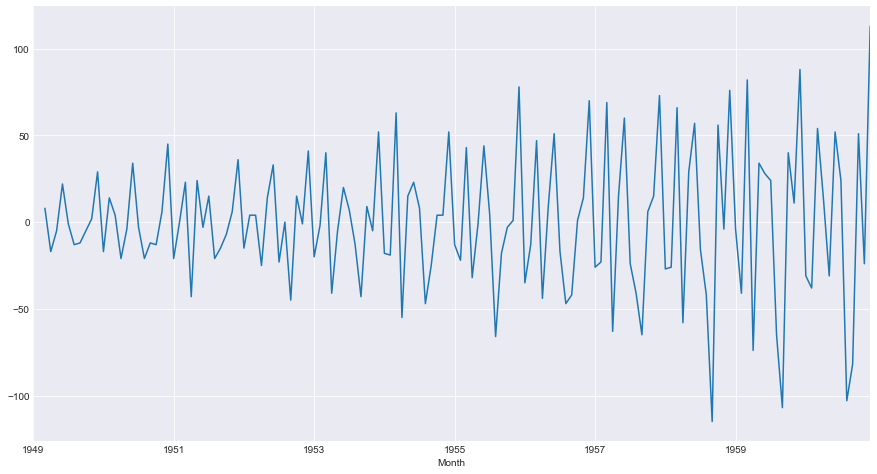

In [55]:
df_pax['diff2'] = df_pax['diff1'] - df_pax['diff1'].shift(1)
df_pax['diff2'].plot()

In [56]:
result = adfuller(df_pax['diff2'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'], result))


{'adf': -16.384231542468488,
 'pvalue': 2.7328918500143186e-29,
 'usedlag': 11,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 988.6020417275604}

The p-value is less than 0.05, so we can reject the null hypothesis. This means that the second difference is stationary and suggests that a good estimate of the d-value is 2.

We will do the same with seasonality.

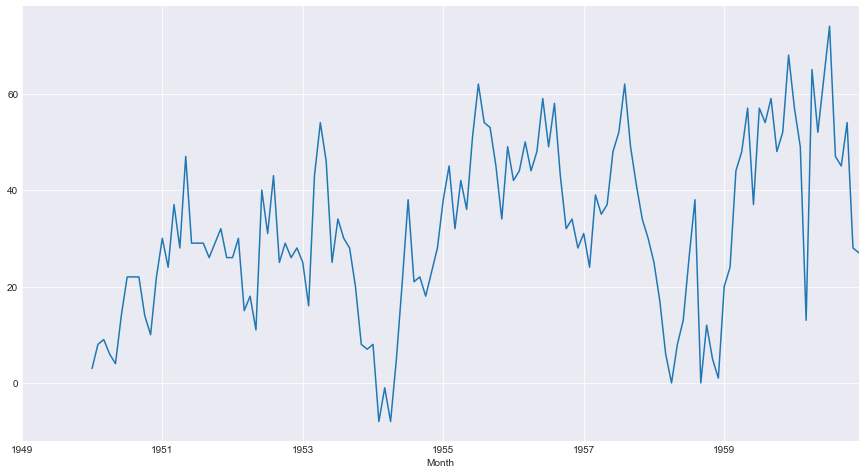

In [57]:
df_pax['Seasonal_Difference'] = df_pax['Passengers'] - df_pax['Passengers'].shift(12)
ax = df_pax['Seasonal_Difference'].plot()

Our data are seasonal, so we need to estimate the D value as well, which is the same as the d value but for the seasonal difference. The seasonal difference can be calculated by scrolling the data by the number of rows per season (in our example 12 months per year) and subtracting it from the previous season. This is not the first seasonal difference. If we get the seasonal difference to be stationary then the D value will be 0. If not, then we will calculate the first seasonal difference.
+ seasonal difference (T) = observation (T) - observation (T-12)
+ first seasonal difference (T) = seasonal difference (T) - seasonal difference (T-1)

In [58]:
result = adfuller((df_pax['Seasonal_Difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'], result))


{'adf': -3.3830207264924805,
 'pvalue': 0.011551493085514982,
 'usedlag': 1,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 919.527129208137}

The p-value is less than 0.05 thus it’s stationary and we don’t have to use differencing. That suggests using 0 for the D value.

## Autocorrelation

The last step before the ARIMA model is to create the Autocorrelation and Partial Autocorrelation Plots to help us estimate the parameters p, q, P and Q.
There are some very useful rules for the ARIMA and Seasonal ARIMA models that we are using to help us estimate the parameters by looking at the Autocorrelation and Partial Autocorrelation Plots. We will create the graphs for the second difference and the seasonal difference of our time series because these are the stationary series that we ended up using in ARIMA (d = 2, D = 0).

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



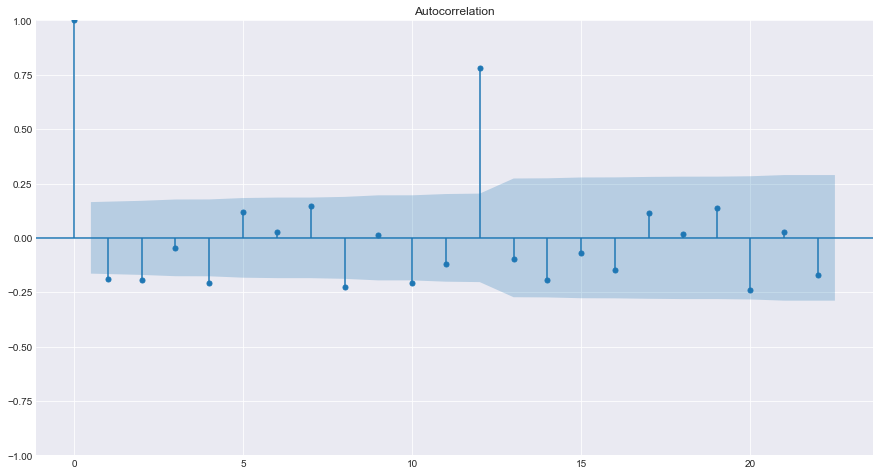

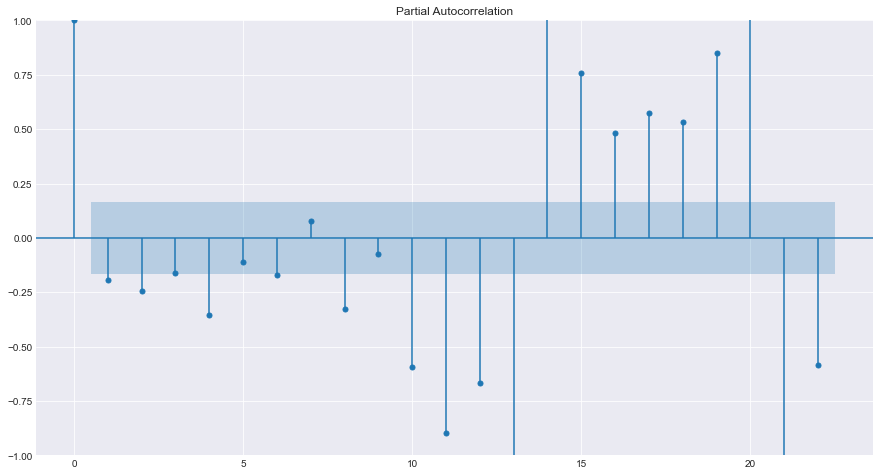

In [59]:

fig1 = plot_acf(df_pax['diff2'].dropna())
fig2 = plot_pacf(df_pax['diff2'].dropna())

We cannot see any sharp cutoffs on either charts. According to the rules we mentioned above but there are significant lags in both charts, this suggests using a term AR and MA. Let's experiment with p = 1 and q = 1.
Now, we need the same seasonal difference graphs.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



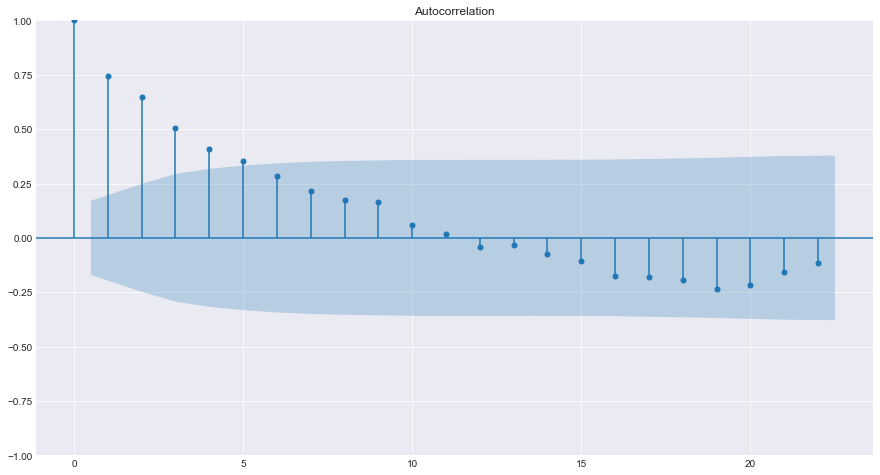

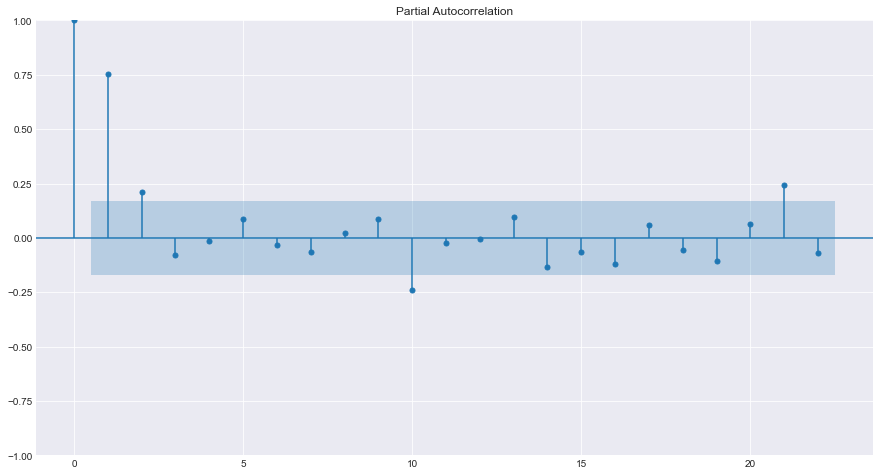

In [60]:
fig1 = plot_acf(df_pax['Seasonal_Difference'].dropna())
fig2 = plot_pacf(df_pax['Seasonal_Difference'].dropna())

We have a gradual decrease in the autocorrelation graph and a cut in the partial autocorrelation graph. This suggests using AR and not exceeding the value of 1 for the seasonal part of the ARIMA.
The values we have chosen may not be optimal. You can play around with these parameters to fine-tune the model with the rules we mentioned earlier as your guide.


In [61]:

model = SARIMAX(df_pax['Passengers'],order=(1,2,1),seasonal_order=(1, 0, 0, 12))
result = model.fit()

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [62]:
print(result.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, [], 12)   Log Likelihood                -565.849
Date:                             Mon, 13 Dec 2021   AIC                           1139.699
Time:                                     11:31:41   BIC                           1151.522
Sample:                                 01-01-1949   HQIC                          1144.503
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2540      0.074     -3.443      0.001      -0.399      -0.109
ma.L1         -0.9991      

In [63]:
# yt = -0.25yt-1 + -0.99et-1 + 0.96yt-12

<AxesSubplot:xlabel='Month'>

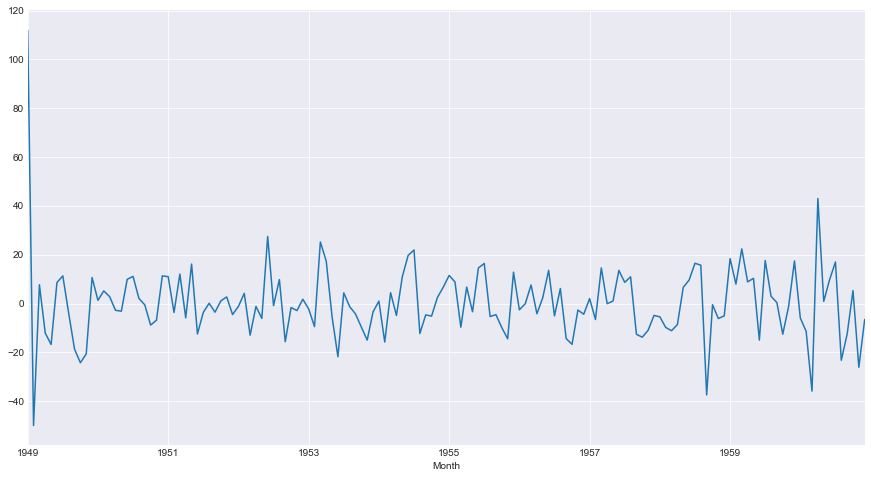

In [64]:
result.resid.plot()


<AxesSubplot:ylabel='Density'>

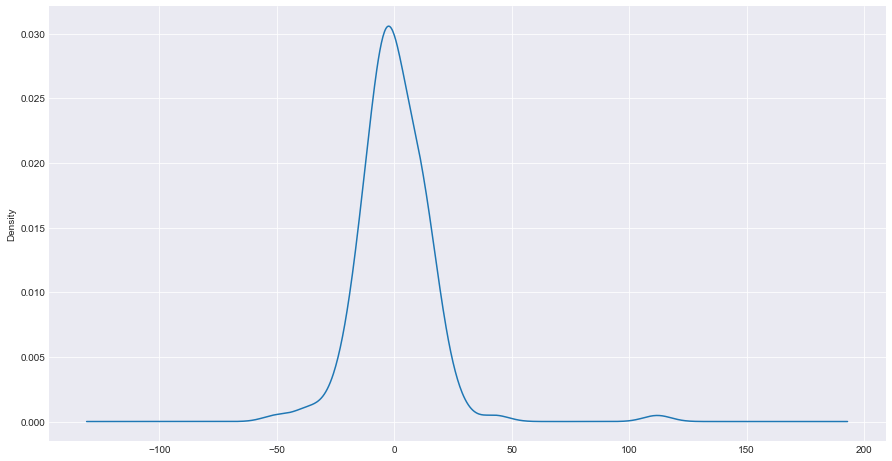

In [65]:
result.resid.plot(kind='kde')


## Prediction

In [66]:
# Create additional dates in the future so you can use it to plot the forecast

from pandas.tseries.offsets import DateOffset
new_dates = [df_pax.index[-1]+DateOffset(months = x) for x in range(1,48)]
df_pred = pd.DataFrame(index = new_dates,columns = df_pax.columns)
df_pred.head()


,Passengers,diff1,diff2,Seasonal_Difference
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

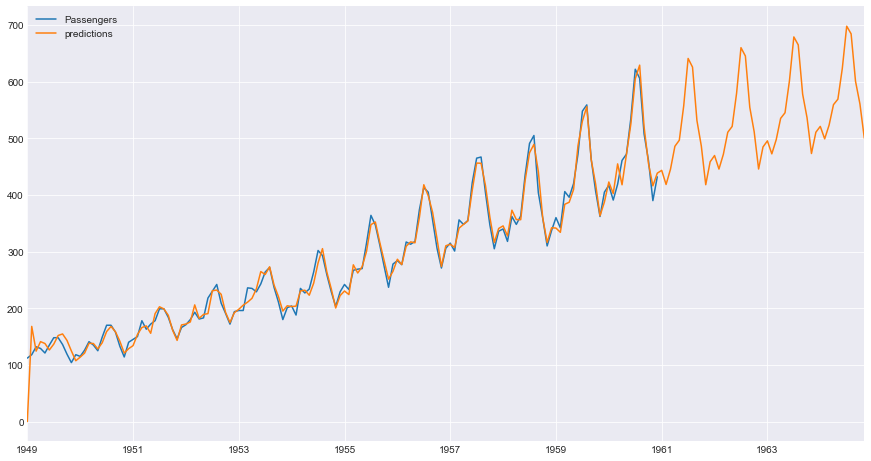

In [67]:
# Create a new dataset with additional dates

df2 = pd.concat([df_pax,df_pred])
df2['predictions'] = result.predict(start=0,end=191)
df2[['Passengers','predictions']].plot()

In [68]:
# Get the error metric

from sklearn.metrics import mean_absolute_error
df2 = df2[~(df2['diff2'].isna()) & ~(df2['predictions'].isna())]
mean_absolute_error(df2['Passengers'], df2['predictions'])

9.54514256078709

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

### Using Auto ARIMA

In [69]:
# Use auto arima to find the best model

Sarimax_model = auto_arima(df_pax['Passengers'],
                       start_P=1,
                       start_q=1,
                       max_p=3,
                       max_q=3,
                       m=12,
                       seasonal=True,
                       D=0,
                       max_d = 3,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1299.259, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1413.909, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1398.827, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1146.800, Time=0.49 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1146.153, Time=0.36 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1146.332, Time=0.69 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1148.148, Time=0.65 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1144.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 12)   Log Likelihood                -564.882
Date:                             Mon, 13 Dec 2021   AIC                           1139.763
Time:                                     11:32:05   BIC                           1154.578
Sample:                                          0   HQIC                          1145.783
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6417      0.089      7.206      0.000       0.467       0.816
ar.L2          0.1602      0.089      1.796      0.073      -0.015       0.335
ma.L1         -0.9648      0.039    -24.997      0.000      -1.040      -0.889
ar.S.L12       0.9606      0.020     49.247      0.000       0.922       0.999
sigma2       128.4012     14.210      9.036      0.000     100.551     156.251
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.67   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
# Fit the best model to the data

# SARIMAX(1, 2, 1)x(1, 0, [], 12)

model = SARIMAX(df_pax['Passengers'],order=(2, 1, 1),
              seasonal_order=(1, 0, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()


C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\chsan\AppData\Local\Continuum\anaconda3\envs\nuclio-0921\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [71]:
# Forecast using the model

forecast = results.predict(start = len(df_pax),
                           end=len(df_pax)+24,
                           typ='levels').rename('data sarimax (1,0,1) forecast')


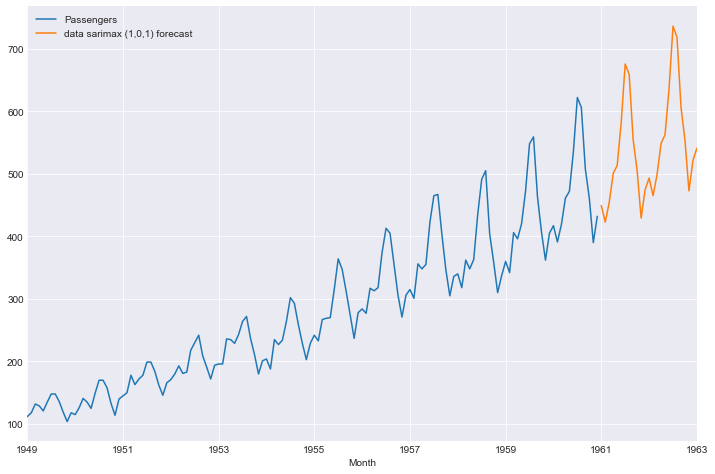

In [72]:
# Plot the forecasted results

df_pax['Passengers'].plot(figsize=(12,8),legend=True)
forecast.plot(legend=True)
plt.show()

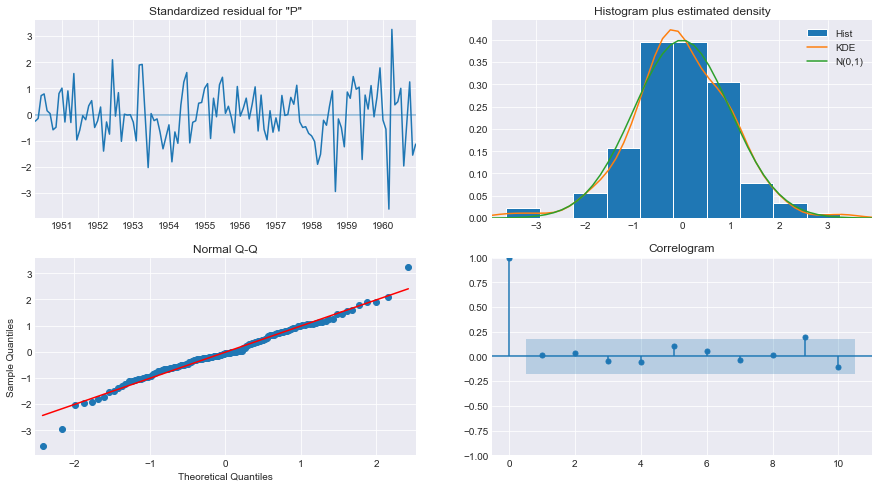

In [75]:
results.plot_diagnostics()
plt.show()


<AxesSubplot:ylabel='Density'>

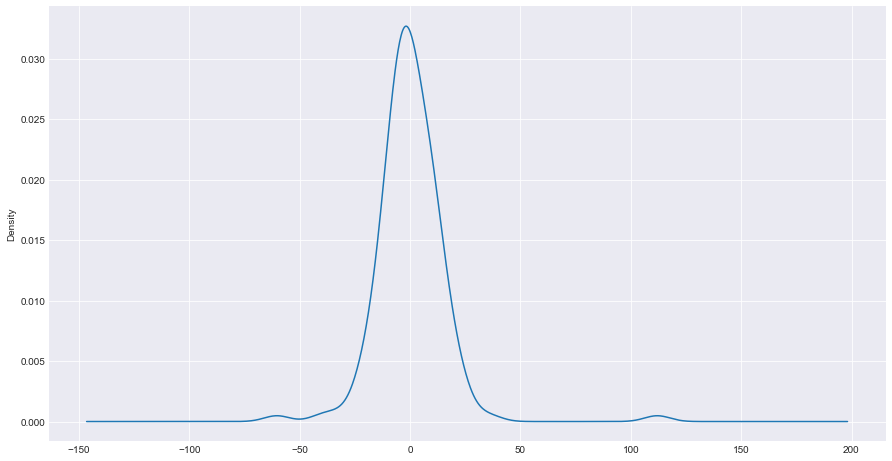

In [73]:
# Plot Residual Density

results.resid.plot(kind='kde')

In this particular example, we haven't split the dataset to train and test, and the forecasts have been done with data where we don't have any observed values, so we cannot calculate the error metrics. If you want to calculate the error metrics, you will have to split the dataset into train and test and calculate the MAE on forecasts vs actual values.